In [1]:
#https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/Logistic_Regression/LogisticRegression_toy_digits.ipynb

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Used for Confusion Matrix
from sklearn import metrics

In [3]:
digits = load_digits()

In [32]:
digits[1]

KeyError: 1

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

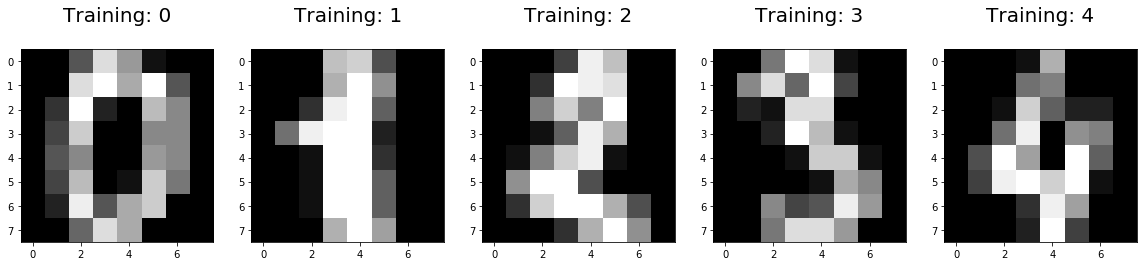

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [7]:
# test_size: what proportion of original data is used for test set
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.25, random_state=0)

In [8]:
print(x_train.shape)

(1347, 64)


In [9]:
print(y_train.shape)

(1347,)


In [10]:
print(x_test.shape)

(450, 64)


In [11]:
print(y_test.shape)

(450,)


In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
#Make Intance of Logistic Regression Model
FruitRegr = LogisticRegression()

In [16]:
FruitRegr.fit(x_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Returns a NumPy Array
# Predict for One Observation (image)
FruitRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [20]:
# Predict for Multiple Observations (images) at Once
FruitRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [22]:
# Make predictions on entire test data
predictions = FruitRegr.predict(x_test)

In [23]:
predictions.shape

(450,)

In [25]:
# Use score method to get accuracy of model
score = FruitRegr.score(x_test, y_test)
print(score)

0.9533333333333334


In [28]:
#
#Confusion Matrix (Matplotlib)
#A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

def plot_confusion_matrix(cm, title='Confusion matrix', cmap='Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

Confusion matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


<Figure size 432x288 with 0 Axes>

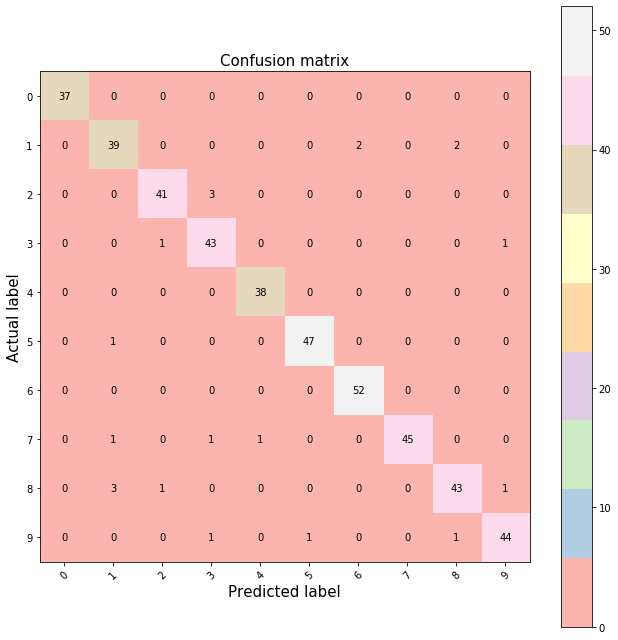

In [29]:
# confusion matrix
confusion = metrics.confusion_matrix(y_test, predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

In [30]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

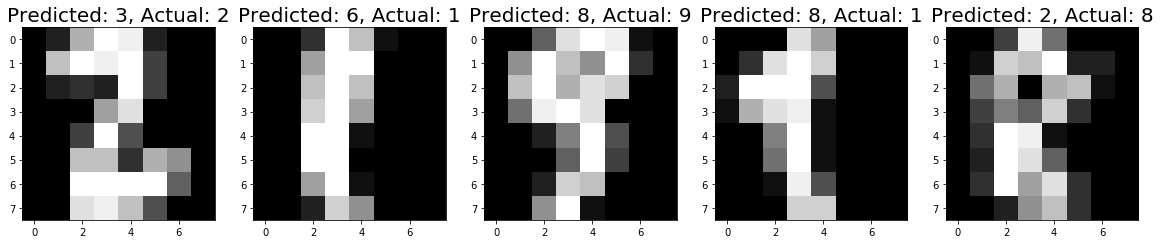

In [31]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)

In [34]:
os.listdir

NameError: name 'os' is not defined

In [33]:
#Pineapples,strawberries,banana,Lychee,Apple Red 1,raspberry,peach,Lemon,lime,pomegranate
#https://medium.com/@waleedka/traffic-sign-recognition-with-tensorflow-629dffc391a6
os.listdir
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

images, labels = load_data(train_data_dir)

NameError: name 'train_data_dir' is not defined